In [40]:
import pandas as pd 

In [41]:
df = pd.read_csv("data_to_work.csv")

In [42]:
df = df.drop(columns=["Unnamed: 0"])

In [43]:
df

,Authors,Body,Keywords,Date,Title
0,"['Alex Seitz-Wald', 'Alex Seitz-Wald Is Senior...","WASHINGTON — Bernie Sanders, Josh Hawley and A...","['minimum', 'businesses', 'republicans', 'chan...",2021-03-08 09:30:00+00:00,'The world has changed': The scrambled new pol...
1,"['Julie Appleby', 'Kaiser Health News']",Each night it’s the same. Story after story on...,"['health', 'vaccine', 'fear', 'vaccination', '...",2021-03-08 09:30:10+00:00,Fear of needles may keep many people away from...
2,[],This is the kind of pre-draft season it’s been...,"['nfl', 'teams', 'hes', 'fmia', 'game', 'overa...",2021-03-07 00:00:00,"FMIA: In This 2021 NFL Draft Primer, Uncertain..."
3,[],"Ken Roczen: ""I think (Cooper Webb) is scared o...","['webb', 'streams', 'video', 'roczen', 'schedu...",2015-08-23 10:58:49-04:00,"Live Streams, Video, News, Schedules, Scores a..."
4,[],Click to email this to a friend (Opens in new ...,"['lebron', 'tnt', 'game', 'win', 'nba', 'lilla...",2021-03-07 00:00:00,"Curry, Lillard, Antetokounmpo put on All-Star ..."
5,"['Gabrielle Jackson', 'Gabrielle Jackson Is An...",While more men have died of Covid-19 at time o...,"['health', 'women', 'symptoms', 'maybe', 'pain...",2021-03-08 09:30:44+00:00,Covid long-haulers are often women. Maybe it'l...
6,"['Amanda Katz', 'Amanda Katz Is A Writer', 'Ed...",Things my friends have sent over group chats r...,"['vaccine', 'gifs', 'friends', 'chats', 'job',...",2021-03-08 09:30:16+00:00,Covid group chats are the saving grace of the ...
7,"['Jane C. Timm', 'Jane C. Timm Is A Political ...",After 15 years allowing voters to cast absente...,"['groups', 'target', 'integrity', 'voting', 's...",2021-03-08 09:31:00+00:00,Georgia Republicans are pushing dozens of 'ele...
8,"['Ken Dilanian', 'Ken Dilanian Is A Correspond...",WASHINGTON — A senator had a simple question f...,"['thats', 'terrorism', 'official', 'monitor', ...",2021-03-08 09:30:12+00:00,An FBI official told Congress the bureau can't...
9,['March'],Dr. Cynthia Kudji-Sylvester and daughter Dr. J...,"['dr', 'spring', 'received', 'making', 'medica...",NaN,Mother-daughter duo making the most of their n...


In [44]:
index = df.Title

In [45]:
index[0]

"'The world has changed': The scrambled new politics of the minimum wage"

In [46]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')

data_cv = cv.fit_transform(df.Body)

data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = df.index
data_dtm

,000,06,07,09,10,100,107,11,117,12,...,zach,zaven,zedong,zero,zerofox,zhang,zimmer,zion,zone,zoom
0,0,0,0,0,2,0,0,2,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,17,1,0,7,2,5,...,11,1,0,1,0,0,2,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
8,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,3,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
count= 0
for row in data_dtm:
    
    data_dtm.rename(index={count: index[count]}, inplace=True)
    count = count +1 
    print(f"value added{count}")



value added1
value added2
value added3
value added4
value added5
value added6
value added7
value added8
value added9
value added10
value added11
value added12


KeyError: 12

In [48]:
data = data_dtm

In [49]:
data

,000,06,07,09,10,100,107,11,117,12,...,zach,zaven,zedong,zero,zerofox,zhang,zimmer,zion,zone,zoom
'The world has changed': The scrambled new politics of the minimum wage,0,0,0,0,2,0,0,2,0,0,...,0,0,0,1,0,0,0,0,0,0
Fear of needles may keep many people away from Covid vaccines,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"FMIA: In This 2021 NFL Draft Primer, Uncertainty Is No. 1 Overall Prospect",0,1,1,1,17,1,0,7,2,5,...,11,1,0,1,0,0,2,0,1,1
"Live Streams, Video, News, Schedules, Scores and more",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Curry, Lillard, Antetokounmpo put on All-Star show in Team LeBron win",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Covid long-haulers are often women. Maybe it'll change the system's perspective on our pain.,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Covid group chats are the saving grace of the pandemic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Georgia Republicans are pushing dozens of 'election integrity' bills. Black voters are the target, rights groups say.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
An FBI official told Congress the bureau can't monitor Americans' social media. That's not true.,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,3,0,0,0,0,0
Mother-daughter duo making the most of their next chapter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#temporary 

#for number in range(0,26):
 #   data = data.rename(index={number: f"Article{number}" })
  #  print(number)
    

In [51]:
data

,000,06,07,09,10,100,107,11,117,12,...,zach,zaven,zedong,zero,zerofox,zhang,zimmer,zion,zone,zoom
'The world has changed': The scrambled new politics of the minimum wage,0,0,0,0,2,0,0,2,0,0,...,0,0,0,1,0,0,0,0,0,0
Fear of needles may keep many people away from Covid vaccines,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"FMIA: In This 2021 NFL Draft Primer, Uncertainty Is No. 1 Overall Prospect",0,1,1,1,17,1,0,7,2,5,...,11,1,0,1,0,0,2,0,1,1
"Live Streams, Video, News, Schedules, Scores and more",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Curry, Lillard, Antetokounmpo put on All-Star show in Team LeBron win",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Covid long-haulers are often women. Maybe it'll change the system's perspective on our pain.,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Covid group chats are the saving grace of the pandemic,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Georgia Republicans are pushing dozens of 'election integrity' bills. Black voters are the target, rights groups say.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
An FBI official told Congress the bureau can't monitor Americans' social media. That's not true.,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,3,0,0,0,0,0
Mother-daughter duo making the most of their next chapter,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
data = data.transpose()

In [53]:
data

,'The world has changed': The scrambled new politics of the minimum wage,Fear of needles may keep many people away from Covid vaccines,"FMIA: In This 2021 NFL Draft Primer, Uncertainty Is No. 1 Overall Prospect","Live Streams, Video, News, Schedules, Scores and more","Curry, Lillard, Antetokounmpo put on All-Star show in Team LeBron win",Covid long-haulers are often women. Maybe it'll change the system's perspective on our pain.,Covid group chats are the saving grace of the pandemic,"Georgia Republicans are pushing dozens of 'election integrity' bills. Black voters are the target, rights groups say.",An FBI official told Congress the bureau can't monitor Americans' social media. That's not true.,Mother-daughter duo making the most of their next chapter,"Young TikTok users tried canceling Eminem. He responded with 'Tone Deaf,' a new song.",Hong Kong's vanishing freedom on the agenda as China's annual congress begins
000,0,0,0,0,0,1,0,0,2,0,0,1
06,0,0,1,0,0,0,0,0,0,0,0,0
07,0,0,1,0,0,0,0,0,0,0,0,0
09,0,0,1,0,0,0,0,0,0,0,0,0
10,2,0,17,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
zhang,0,0,0,0,0,0,0,0,0,0,0,1
zimmer,0,0,2,0,0,0,0,0,0,0,0,0
zion,0,0,0,0,1,0,0,0,0,0,0,0
zone,0,0,1,0,0,0,0,0,0,0,0,0


In [54]:
# Find the top 15 words 
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(15)
    top_dict[c]= list(zip(top.index, top.values))
    
top_dict

{"'The world has changed': The scrambled new politics of the minimum wage": [('wage',
   27),
  ('15', 25),
  ('minimum', 23),
  ('business', 18),
  ('amazon', 12),
  ('businesses', 10),
  ('said', 9),
  ('democrats', 8),
  ('small', 8),
  ('hour', 8),
  ('chamber', 7),
  ('raising', 7),
  ('republicans', 6),
  ('sanders', 5),
  ('new', 5)],
 'Fear of needles may keep many people away from Covid vaccines': [('said',
   25),
  ('fear', 20),
  ('people', 18),
  ('needles', 16),
  ('vaccine', 8),
  ('covid', 8),
  ('hoffmann', 7),
  ('health', 7),
  ('public', 7),
  ('percent', 6),
  ('19', 6),
  ('vaccination', 6),
  ('guidry', 5),
  ('geller', 5),
  ('tv', 5)],
 'FMIA: In This 2021 NFL Draft Primer, Uncertainty Is No. 1 Overall Prospect': [('year',
   80),
  ('draft', 51),
  ('nfl', 45),
  ('said', 39),
  ('years', 34),
  ('think', 30),
  ('game', 30),
  ('just', 29),
  ('good', 28),
  ('team', 27),
  ('million', 27),
  ('week', 25),
  ('know', 25),
  ('teams', 24),
  ('round', 22)],
 '

In [55]:
from wordcloud import WordCloud

wc = WordCloud( background_color="white", colormap="Dark2",
               max_font_size=150)

In [56]:
df['Body_1'] = df['Body'].astype('string')

In [57]:
title_list = []
for title in index: 
    title_list.append(title)

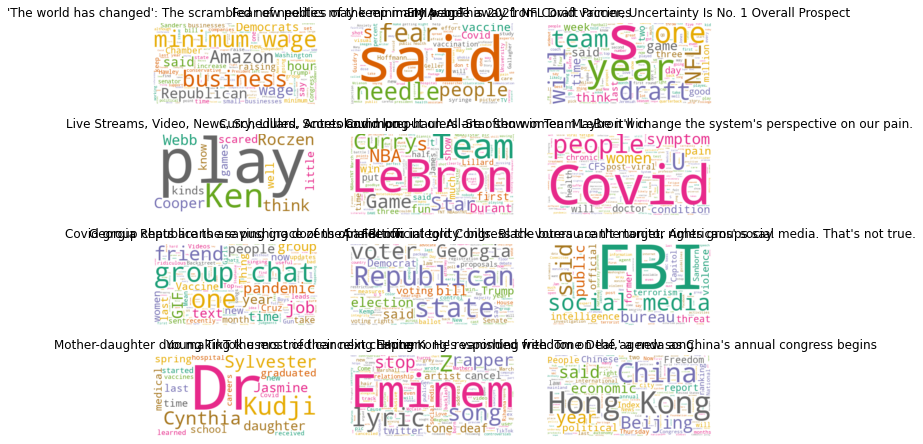

In [99]:
import matplotlib.pyplot as plt

#saves individual images
count = 1
count_2 = 0
for article in df["Body_1"]:
    plt.rcParams['figure.figsize'] = [10, 20]
    word_cloud = wc.generate(article)
    plt.subplot(10, 3, int(count))
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.title(title_list[count_2])
    plt.axis("off")
    word_cloud.to_file(f'clouds/words_test{count_2}.png') 
    count_2 = count_2 + 1
    count = count + 1



#image = plt.show()
#wc.to_file('words_test.png') 


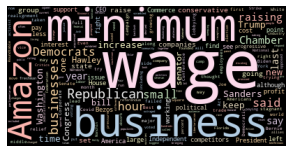

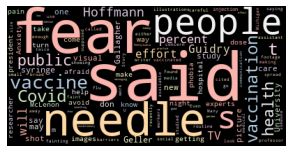

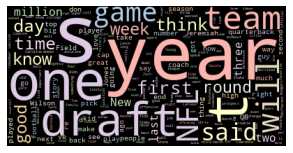

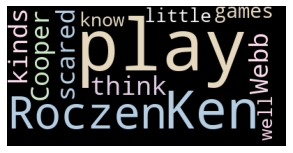

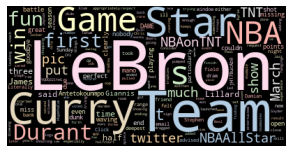

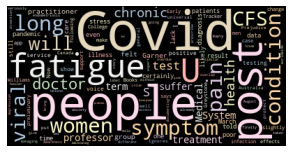

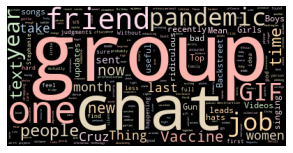

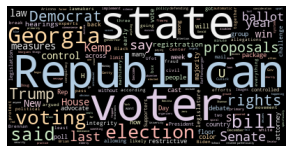

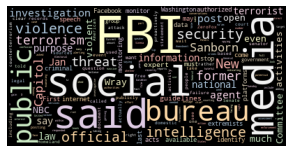

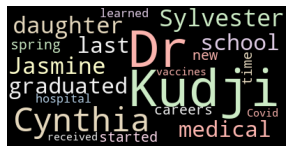

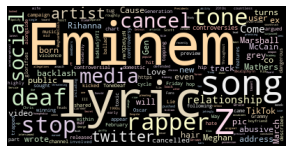

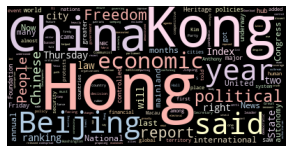

In [98]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(5, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    
for article in df["Body_1"]:
    count = 1
    wordcloud = WordCloud(  
                      colormap='Pastel1', 
                      collocations=False).generate(article)
    wordcloud.to_file(f'clouds/image{count}.png') 
    
    plot_cloud(wordcloud)
    count = count +1
# Plot
#plot_cloud(wordcloud)

In [ ]:
pd.DataFrame.from_dict(top_dict)

In [ ]:
title_list = []
for title in index: 
    title_list.append(title)
    

In [ ]:
title_list